# THEME BASED PROJECT
### Apoorva 1602-17-737-008
### Junaid 1602-17-737-020
### Smaran 1602-17-737-035

Here we are importing the libraries and respective classes that we need for the execution of this ML algorithm. And also we are setting the path to the dataset that is stored in the /data section. We are also declaring a few values and parameters that we are going to be using in this code.



In [1]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from IPython.display import clear_output
from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook

%matplotlib inline
stk_path = '.\\MapReduce\\Test1\\daily\\output2\\Daily\\part-r-00000'
test_size = 0.2                 
cv_size = 0.2                   
Nmax = 30              
                                
fontsize = 14
ticklabelsize = 14


In [2]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i])))
        y_train = np.array(df['adj_close'][i-N:i]) 
        X_train = X_train.reshape(-1, 1)
        y_train = y_train.reshape(-1, 1)
        regr.fit(X_train, y_train)          
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0]) 
        
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_csv(stk_path, sep = "\t")


In [4]:
grouped = df.groupby(df.stock_name)
names = df['stock_name'].unique().tolist()
for item in names:
    print(item)

AAPL
ACN
ADDYY
AMZN
BABA
BBY
DELL
DTCCX
F
FB
G
GOOGL
HOG
HPQ
IBM
INFY.NS
KO
MSFT
NKE
NTDOF
ORCL
PEGA
RELIANCE.NS
RZZRY
SNE
TATAMOTORS.NS
TWTR
UA
VRSK
WMT


Here we are reading our dataset from the specified path above using dataframes and then we are taking only the data related to the stock price of the company that the user mentioned

In [5]:
#for exploring different stocks(give 1st letter and we'll show you list of stocks starting with that letter)
check=input("Enter the letter: ") 
res = [idx for idx in names if idx[0] == check.upper()]
print(res)
#works for one letter only

Enter the letter: a
['AAPL', 'ACN', 'ADDYY', 'AMZN']


In [6]:
#Enter the Stock symbol and we will do furthur analysis
flag = 0

while flag == 0:
    stock_code = input("Enter stock code: ").upper().strip()
    #print(stock_code)
    #print(type(stock_code))
    if stock_code not in names:
        clear_output(wait=True)
        print('invalid code\n See and Re-enter!!')
    if stock_code in names:
        flag = 1
print(stock_code)

df=df[df.stock_name == stock_code]


Enter stock code: AApl
AAPL


In [8]:
df.loc[:, 'date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df['months'] = df['date'].dt.month
df.sort_values(by='date', inplace=True, ascending=True)


df.head(10)

C:\Users\Innu\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Innu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Innu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

,stock_name,date,adj_close,months
0,AAPL,2015-05-04,118.437393,5
1,AAPL,2015-05-05,115.768646,5
2,AAPL,2015-05-06,115.041649,5
3,AAPL,2015-05-07,115.753204,5
4,AAPL,2015-05-08,117.934090,5
5,AAPL,2015-05-11,116.732750,5
6,AAPL,2015-05-12,116.316917,5
7,AAPL,2015-05-13,116.446297,5
8,AAPL,2015-05-14,119.163139,5
9,AAPL,2015-05-15,118.996811,5


This next step is just the visualization of the entire historical data of the given stock price throughtout the taken period of time

Text(0, 0.5, 'USD')

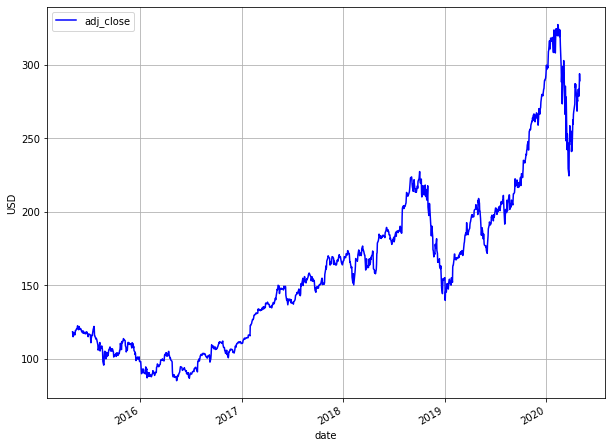

In [9]:
rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are displaying the sizes and shapes of our training, testing and validation datasets

In [10]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

train = df[:num_train].copy()
cv = df[num_train:num_train+num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 757
num_cv = 251
num_test = 251
train.shape = (757, 4)
cv.shape = (251, 4)
train_cv.shape = (1008, 4)
test.shape = (251, 4)


Here we are using a graph to visualize the division of the dataset into the respective testing, training and validation datasets using multiple colours

Text(0, 0.5, 'USD')

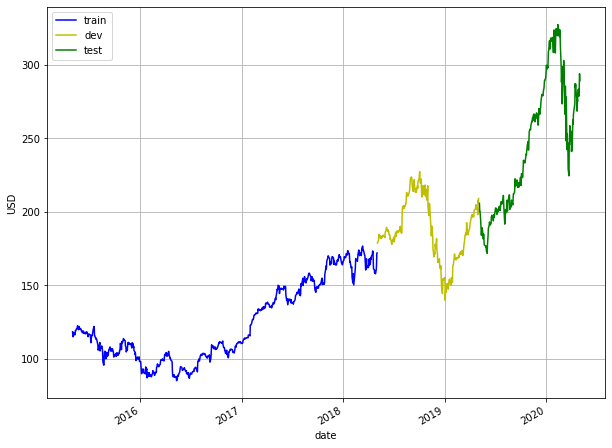

In [11]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are converting our given range of values into RMSE(Root mean squared error), R2(R squared), MAPE(Mean absolute percentage error) in order to have more uniform range of values for the Linear Regression Model to function on

In [13]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_lin_reg(train_cv, 'adj_close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    R2.append(r2_score(cv['adj_close'], est_list))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
cv.head()

RMSE = [3.405840541085184, 4.884900373527748, 4.3438528191762655, 4.2761418204122, 4.30570366793123, 4.345046080986773, 4.350660860606473, 4.283263708994983, 4.26619755874204, 4.3322341134885995, 4.43017257592026, 4.531107909272959, 4.614293353756322, 4.692173660995938, 4.77655292236186, 4.896703726339524, 5.032945061399603, 5.136132013291203, 5.209212653390748, 5.262152031637199, 5.315927990574757, 5.366610364159375, 5.410856674425256, 5.44114732797486, 5.4827638189047, 5.534273047633017, 5.58989169595973, 5.6674321727587715, 5.730667052179117, 5.801901628068858]
R2 = [0.9729343029057885, 0.9443222063392558, 0.9559728270936398, 0.9573347007251919, 0.9567427536771108, 0.9559486351322242, 0.9558347129736253, 0.9571924647765317, 0.9575329081690631, 0.9562080351760643, 0.9542056515587344, 0.9520951586946419, 0.9503200673662511, 0.9486289136116575, 0.9467646904859618, 0.9440528134888302, 0.9408962583932226, 0.93844788913238, 0.9366838106507845, 0.9353903515021565, 0.934063062159802, 0.9327

,stock_name,date,adj_close,months,est_N1,est_N2,est_N3,est_N4,est_N5,est_N6,...,est_N21,est_N22,est_N23,est_N24,est_N25,est_N26,est_N27,est_N28,est_N29,est_N30
757,AAPL,2018-05-04,178.733322,5,171.985733,172.296844,176.931387,177.483956,177.112544,175.062016,...,163.356282,163.493856,163.893559,164.366020,164.671211,165.022868,165.180474,165.004335,165.384418,165.449722
758,AAPL,2018-05-07,180.026459,5,178.733322,185.480911,181.189926,182.520340,182.602008,182.125916,...,166.043463,165.924418,165.934453,166.207070,166.561701,166.766740,167.025246,167.104682,166.867854,167.172146
759,AAPL,2018-05-08,180.891769,5,180.026459,181.319596,184.955897,183.555809,184.852834,185.253408,...,168.353082,168.556000,168.331593,168.239021,168.406787,168.662736,168.783459,168.962576,168.975227,168.686882
760,AAPL,2018-05-09,182.165451,5,180.891769,181.757079,182.042297,184.912132,184.604887,186.040946,...,170.772287,170.742356,170.837332,170.532886,170.360282,170.443732,170.619062,170.670769,170.784063,170.741445
761,AAPL,2018-05-10,184.771149,5,182.165451,183.439133,183.166885,183.244674,185.515912,185.626098,...,173.552624,173.105869,172.987175,172.995417,172.627627,172.390078,172.403171,172.510219,172.503265,172.559933


Here we select the N valuee to get an optimal output, it is arbitrary and doesn't have any logic to selecting it's value, but 5 is being used a standard and can be changed in order to improve accuracy of the outputs

In [14]:
# Set optimum N
N_opt = 5

Here we are using the N value selected to apply the Linear Regression model on n Days worth of historical data of the prices and predict the closing stock price on the (n+1)th day. Also we are representating this output in the form of a graph.

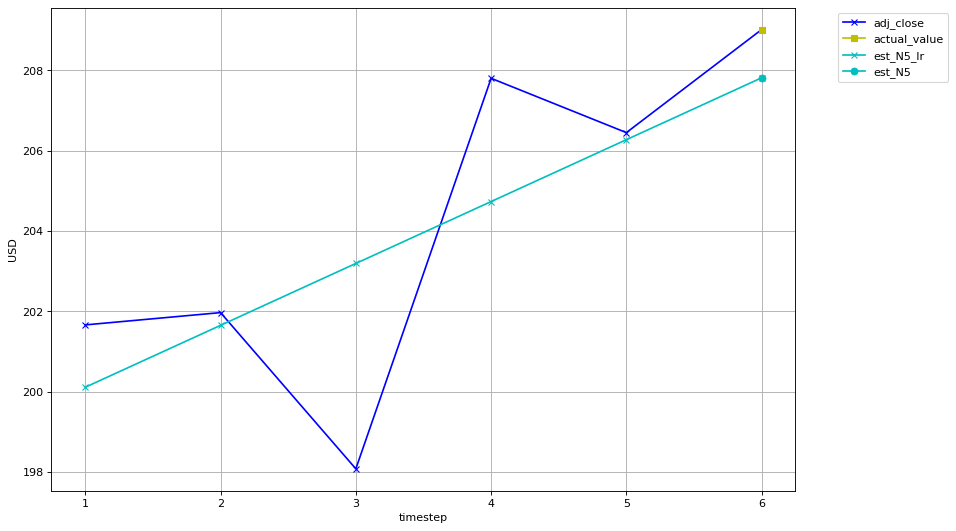

In [16]:
day = pd.Timestamp(date(2020, 1, 19))
Nmax2 = 5
df_temp = cv[cv['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['adj_close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['adj_close'], 'ys-')
legend_list = ['adj_close', 'actual_value']

# Plot the linear regression lines and the predictions
color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True) # Create linear regression object
for N in range(5, Nmax2+1):
    # Plot the linear regression lines
    X_train = np.array(range(len(df_temp['adj_close'][-N-1:-1]))) # e.g. [0 1 2 3 4]
    y_train = np.array(df_temp['adj_close'][-N-1:-1]) # e.g. [2944 3088 3226 3335 3436]
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            # Train the model
    y_est = regr.predict(X_train)         # Get linear regression line
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    # Plot the predictions
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('USD')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))

Here we are visualizing the predicted values when we select N=1 and 5 along with our test,train and validation datasets

Text(0, 0.5, 'USD')

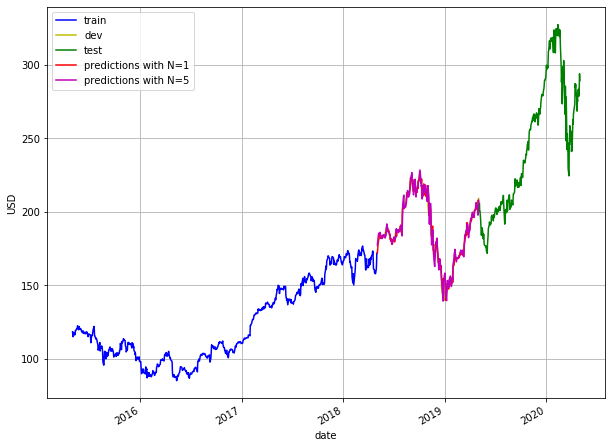

In [17]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

This is just a zoomed in representation of our valiation set with 2 N values

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'builtin_function_or_method'

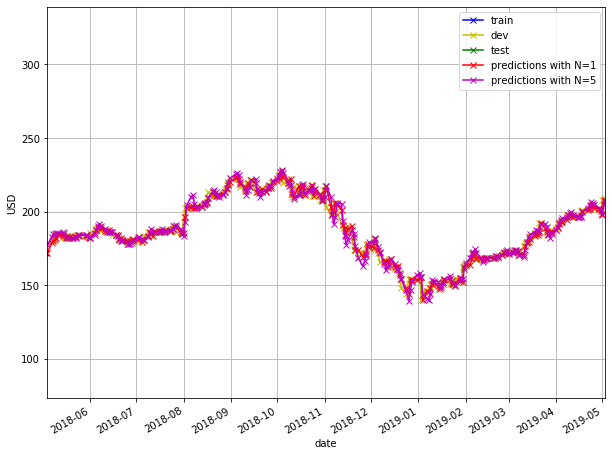

In [18]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='rx-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([cv.date.min(), cv.date.max()])
ax.set_ylim([min, max])
ax.set_title('Zoom in to vd set')

These are some of the perfomance metrics to inform us about the accuracy of the outputs of the Linear Regression model

In [20]:
est_list = get_preds_lin_reg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + str(N_opt)] = est_list
print("RMSE = %f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("R2 = %0.3f" % r2_score(test['adj_close'], est_list))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
print("Variance Score:", r2_score(test['adj_close'], est_list))
test.head()

RMSE = 7.229568
R2 = 0.972
MAPE = 1.977%
Variance Score: 0.9722592921584612


,stock_name,date,adj_close,months,est_N5
1008,AAPL,2019-05-06,205.786469,5,211.400978
1009,AAPL,2019-05-07,200.239075,5,210.414890
1010,AAPL,2019-05-08,200.278534,5,201.122515
1011,AAPL,2019-05-09,198.126709,5,198.019116
1012,AAPL,2019-05-10,195.381973,5,194.504114


Text(0, 0.5, 'USD')

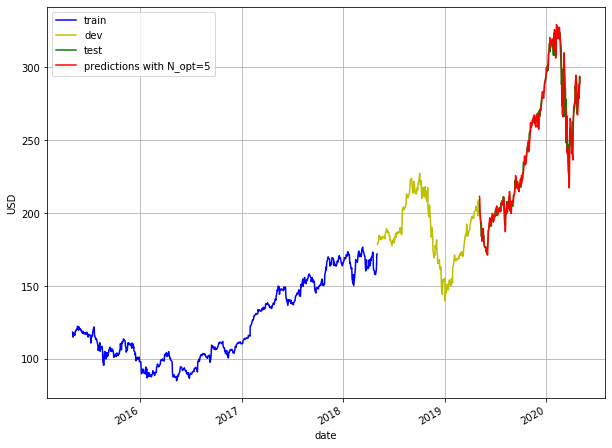

In [21]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Here we are zooming in to our test set along with the predicted values

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'builtin_function_or_method'

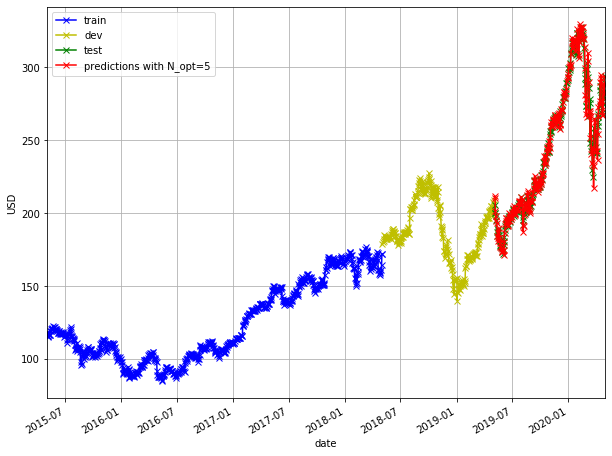

In [22]:
rcParams['figure.figsize'] = 10, 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions with N_opt=5'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([df.date.min(), df.date.max()])
ax.set_ylim([min, max])
ax.set_title('Zoom in to test set')

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'builtin_function_or_method'

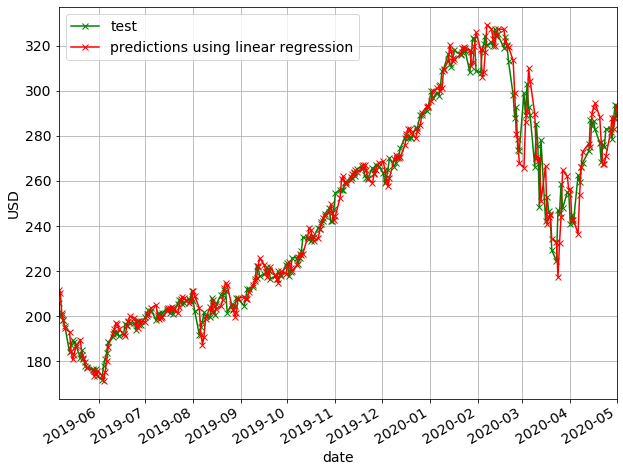

In [23]:
rcParams['figure.figsize'] = 10, 8
matplotlib.rcParams.update({'font.size': 14})
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True)
ax = test.plot(x='date', y='est_N5', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using linear regression'], loc='upper left')
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([test.date.min(), test.date.max()])
ax.set_ylim([min, max])

This is the ML algorithm that was implemented using Hadoop MapReduce to reduce dataset size and analyse big data related to stock market. Thank you. ☺ ♥
